<a href="https://colab.research.google.com/github/abhishek-pes/DA-Project-Amazon-product-listing/blob/main/AmazonProductNLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TEAM DATA 404




## Importing Modules


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime

## Importing Dataset


In [2]:
url = 'https://raw.githubusercontent.com/abhishek-pes/DA-Project-Amazon-product-listing/main/AmazonData.csv'
amzn = pd.read_csv(url, error_bad_lines=False)

In [3]:
amzn.head()

,Uniq Id,Crawl Timestamp,Category,Product Title,Product Description,Brand,Pack Size Or Quantity,Mrp,Price,Offers,Combo Offers,Stock Availibility
0,eb49cc038190f6f03c272f79fbbce894,2019-10-30 11:38:11 +0000,Skin Care,Lee posh Lactic Acid 60% Anti ageing Pigmenta...,PROFESSIONAL GRADE Face Peel: this peel stimul...,Lee Posh,NaN,2000,799,60.05%,NaN,YES
1,1657cc30c438affede6a5060d6847363,2019-10-31 15:46:54 +0000,Skin Care,Branded SLB Works New 1.5mm Titanium 1200 nee...,Item name: 1.5mm titanium 1200 needles microne...,SLB Works,NaN,2040,2040,0%,NaN,YES
2,41654633cce38c8650690f6dbac01fd3,2019-10-30 09:53:23 +0000,Skin Care,Generic 1 Pc brand snail eye cream remove dar...,"Use: eye, item type: cream, net wt: 20g, gzzz:...",Generic,NaN,1824,1042,42.87%,NaN,YES
3,08b1bd85c3efc2d7aa556fd79b073382,2019-10-29 16:16:52 +0000,Skin Care,Generic Anti Snoring Snore Stopper Sleep Apne...,Prevent the tongue from dropping backward or b...,Generic,NaN,2185,1399,35.97%,NaN,YES
4,3ac3f213732512d1d11bb73ab3b1900f,2019-10-31 09:32:06 +0000,Grocery & Gourmet Foods,Harveys Crunchy & Creame Gourmet Delicacies C...,Harvey's wafer Cream Wafer 110g. Made in India,Harveys,NaN,594,570,4.04%,NaN,YES


###Rows,Columns

In [4]:
amzn.shape

(30000, 12)

In [5]:
amzn['Brand'].value_counts()

CHOCOCRAFT         1465
Generic            1284
Chocholik           698
World Beauty        527
BOGATCHI            420
                   ... 
Jigott                1
Superman              1
HoneyCombs            1
Emazing Gourmet       1
Sikandar              1
Name: Brand, Length: 8454, dtype: int64

In [6]:
amzn.nunique()

Uniq Id                  30000
Crawl Timestamp          27870
Category                     6
Product Title            29630
Product Description      22576
Brand                     8454
Pack Size Or Quantity      453
Mrp                       6371
Price                     6296
Offers                    4338
Combo Offers                36
Stock Availibility           2
dtype: int64

###No. of NULL/Na values in each field

In [7]:
amzn.isna().sum()

Uniq Id                      0
Crawl Timestamp              0
Category                     0
Product Title                0
Product Description       1990
Brand                       87
Pack Size Or Quantity    19776
Mrp                        699
Price                      600
Offers                     466
Combo Offers             29963
Stock Availibility           0
dtype: int64

  #### HEATMAP FOR NULL VALUES

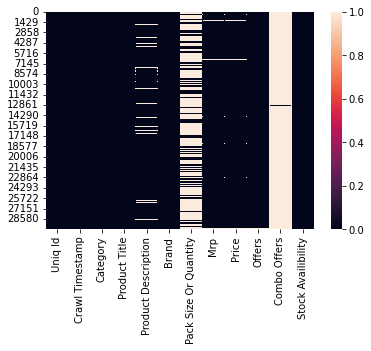

In [8]:
sns.heatmap(amzn.isna())

In [9]:
amzn.describe()

,Uniq Id,Crawl Timestamp,Category,Product Title,Product Description,Brand,Pack Size Or Quantity,Mrp,Price,Offers,Combo Offers,Stock Availibility
count,30000,30000,30000,30000,28010,29913,10224,29301,29400,29534,37,30000
unique,30000,27870,6,29630,22576,8454,453,6371,6296,4338,36,2
top,00e412531c3b951afd2608127182c3ad,2019-10-29 01:31:53 +0000,Skin Care,Xplus Bath Loofah(Pack of 3),This Chocolate Gift Box contains delectable as...,CHOCOCRAFT,327 Grams,999,695,0%,RTF Special offer Aloe vera Magnetic cool eye...,YES
freq,1,4,15033,39,276,1465,437,808,389,12300,2,29523


## DATA CLEANING



### Brand column fix

In [10]:
#there are empty spaces in brand column which is as good as NaN value
amzn['Brand'].replace(' ',np.NaN,inplace=True)
print("EMPTY VALUES IN BRAND COLUMN: ",amzn['Brand'].isna().sum())

EMPTY VALUES IN BRAND COLUMN:  184


Since there is only 184 empty  in the brand column , we can impute these values instead of removing it.

In [11]:
amzn['Brand'].replace(np.NaN,-1,inplace=True)
for i in range(len(amzn['Uniq Id'])):
    if(amzn['Brand'][i] == -1):
        brand = amzn['Product Title'][i].strip().split(' ')
        amzn['Brand'][i] = " ".join(brand[0:2])
        #print(brand[0:2])

In [12]:
amzn.isna().sum()

Uniq Id                      0
Crawl Timestamp              0
Category                     0
Product Title                0
Product Description       1990
Brand                        0
Pack Size Or Quantity    19776
Mrp                        699
Price                      600
Offers                     466
Combo Offers             29963
Stock Availibility           0
dtype: int64

### Price and Mrp Coulumn Fix

In [13]:
amzn['Price'].replace('NAN',np.NaN,inplace=True)
print("EMPTY VALUES IN PRICE COLUMN: ",amzn['Price'].isna().sum())

EMPTY VALUES IN PRICE COLUMN:  600


In [14]:
for i in range(len(amzn['Uniq Id'])):
  try:
    amzn['Price'][i] == float(amzn['Price'][i])
    amzn['Mrp'][i] == float(amzn['Mrp'][i])
  except:
    price = float(amzn['Price'][i][1:])
    mrp = float(amzn['Mrp'][i][1:])
    amzn['Price'][i] = price
    amzn['Mrp'][i] = mrp

In [15]:
for i in range(len(amzn['Uniq Id'])):
  try:
    amzn['Mrp'][i] == float(amzn['Mrp'][i])
  except:
    mrp = float(amzn['Mrp'][i][1:])
    amzn['Mrp'][i] = mrp

In [16]:
amzn['Category'].value_counts()

Skin Care                  15033
Grocery & Gourmet Foods     8064
Hair Care                   2459
Bath & Shower               2140
Fragrance                   2107
Detergents & Dishwash        197
Name: Category, dtype: int64

In [17]:
amzn['Price'] = amzn['Price'].astype('float')
amzn['Mrp'] = amzn['Mrp'].astype('float')

skin_care = amzn[amzn['Category'] == 'Skin Care']
grocery =  amzn[amzn['Category'] == 'Grocery & Gourmet Foods']
bath = amzn[amzn['Category'] == 'Bath & Shower']
fragrance = amzn[amzn['Category'] == 'Fragrance']
Hair = amzn[amzn['Category'] == 'Hair Care']
Dish =amzn[amzn['Category'] == 'Detergents & Dishwash']
#np.mean([amzn['Price'][i]=='Hair Care' for i in range(len(amzn['Uniq Id']))])

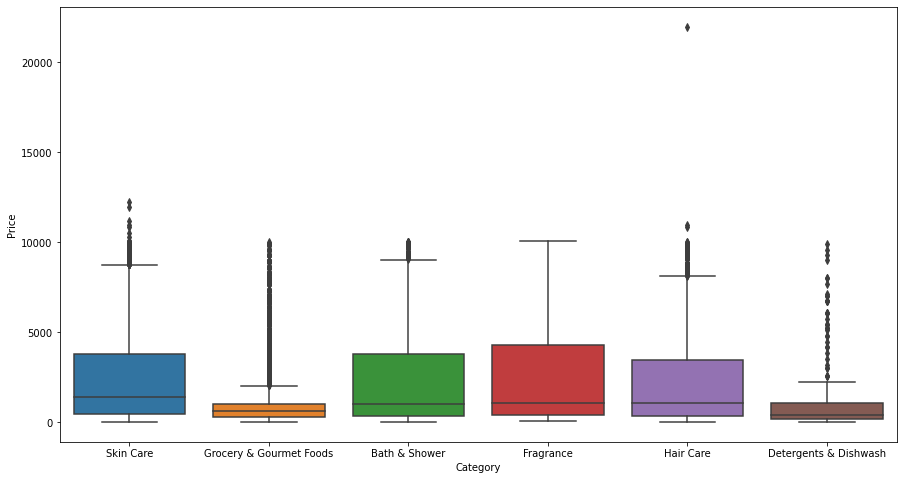

In [18]:
plt.figure(figsize = (15,8))
sns.boxplot(y = amzn['Price'],  x = amzn['Category'])

In [19]:
print("THE MEDIAN PRICE FOR THE CATEGORY SKIN CARE IS : ",np.nanmedian(skin_care['Price']))
skin_care['Price'].fillna(np.nanmedian(skin_care['Price']),inplace=True)
print("THE MEDIAN PRICE FOR THE CATEGORY GROCERY IS : ",np.nanmedian(grocery['Price']))
grocery['Price'].fillna(np.nanmedian(grocery['Price']),inplace=True)
print("THE MEDIAN PRICE FOR THE CATEGORY BATH & SHOWER IS : ",np.nanmedian(bath['Price']))
bath['Price'].fillna(np.nanmedian(bath['Price']),inplace=True)
print("THE MEDIAN PRICE FOR THE CATEGORY FRAGRANCE IS : ",np.nanmedian(fragrance['Price']))
fragrance['Price'].fillna(np.nanmedian(fragrance['Price']),inplace=True)
print("THE MEDIAN PRICE FOR THE CATEGORY HAIR CARE IS : ",np.nanmedian(Hair['Price']))
Hair['Price'].fillna(np.nanmedian(Hair['Price']),inplace=True)
print("THE MEDIAN PRICE FOR THE CATEGORY DETERGENTS & DISHWASH IS : ",np.nanmedian(Dish['Price']))
Dish['Price'].fillna(np.nanmedian(Dish['Price']),inplace=True)

THE MEDIAN PRICE FOR THE CATEGORY SKIN CARE IS :  1390.0
THE MEDIAN PRICE FOR THE CATEGORY GROCERY IS :  630.0
THE MEDIAN PRICE FOR THE CATEGORY BATH & SHOWER IS :  1029.0
THE MEDIAN PRICE FOR THE CATEGORY FRAGRANCE IS :  1056.5
THE MEDIAN PRICE FOR THE CATEGORY HAIR CARE IS :  1047.5
THE MEDIAN PRICE FOR THE CATEGORY DETERGENTS & DISHWASH IS :  399.0


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [20]:
print("THE MEDIAN MRP FOR THE CATEGORY SKIN CARE IS : ",np.nanmedian(skin_care['Mrp']))
skin_care['Mrp'].fillna(np.nanmedian(skin_care['Mrp']),inplace=True)
print("THE MEDIAN MRP FOR THE CATEGORY GROCERY IS : ",np.nanmedian(grocery['Mrp']))
grocery['Mrp'].fillna(np.nanmedian(grocery['Mrp']),inplace=True)
print("THE MEDIAN MRP FOR THE CATEGORY BATH & SHOWER IS : ",np.nanmedian(bath['Mrp']))
bath['Mrp'].fillna(np.nanmedian(bath['Mrp']),inplace=True)
print("THE MEDIAN MRP FOR THE CATEGORY FRAGRANCE IS : ",np.nanmedian(fragrance['Mrp']))
fragrance['Mrp'].fillna(np.nanmedian(fragrance['Mrp']),inplace=True)
print("THE MEDIAN MRP FOR THE CATEGORY HAIR CARE IS : ",np.nanmedian(Hair['Mrp']))
Hair['Mrp'].fillna(np.nanmedian(Hair['Mrp']),inplace=True)
print("THE MEDIAN MRP FOR THE CATEGORY DETERGENTS & DISHWASH IS : ",np.nanmedian(Dish['Mrp']))
Dish['Mrp'].fillna(np.nanmedian(Dish['Mrp']),inplace=True)

THE MEDIAN MRP FOR THE CATEGORY SKIN CARE IS :  1843.0
THE MEDIAN MRP FOR THE CATEGORY GROCERY IS :  699.0
THE MEDIAN MRP FOR THE CATEGORY BATH & SHOWER IS :  1521.0
THE MEDIAN MRP FOR THE CATEGORY FRAGRANCE IS :  1499.0
THE MEDIAN MRP FOR THE CATEGORY HAIR CARE IS :  1339.0
THE MEDIAN MRP FOR THE CATEGORY DETERGENTS & DISHWASH IS :  425.0


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [21]:
amzn = pd.concat([skin_care,grocery,bath,fragrance,Hair,Dish])
len(amzn)

30000

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



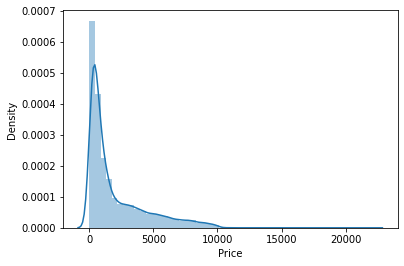

In [22]:
sns.distplot(amzn['Price'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



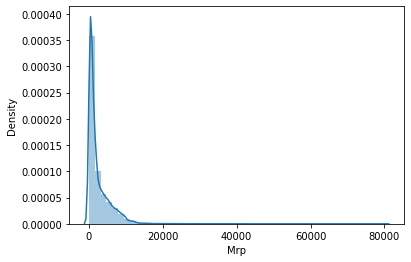

In [23]:
sns.distplot(amzn['Mrp'])

In [24]:
amzn.isna().sum()

Uniq Id                      0
Crawl Timestamp              0
Category                     0
Product Title                0
Product Description       1990
Brand                        0
Pack Size Or Quantity    19776
Mrp                          0
Price                        0
Offers                     466
Combo Offers             29963
Stock Availibility           0
dtype: int64

### OFFER column fix


In [25]:
l = list(amzn.index)
len(l)

30000

In [26]:
inval =[]
for i in l:
  try:
    discount = (1 - amzn['Price'][i]/amzn['Mrp'][i])*100
    if(discount < 0):
      print("MRP :",amzn['Mrp'][i])
      print("PRICE:",amzn['Price'][i])
      discount = 0
    amzn['Offers'][i] = discount
  except:
    inval.append(i)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



MRP : 1843.0
PRICE: 3200.0
MRP : 1843.0
PRICE: 2378.0
MRP : 1843.0
PRICE: 7820.0
MRP : 1843.0
PRICE: 6625.0
MRP : 699.0
PRICE: 773.0
MRP : 1499.0
PRICE: 3829.0
MRP : 1339.0
PRICE: 3045.0
MRP : 425.0
PRICE: 455.68


In [27]:
amzn.head()

,Uniq Id,Crawl Timestamp,Category,Product Title,Product Description,Brand,Pack Size Or Quantity,Mrp,Price,Offers,Combo Offers,Stock Availibility
0,eb49cc038190f6f03c272f79fbbce894,2019-10-30 11:38:11 +0000,Skin Care,Lee posh Lactic Acid 60% Anti ageing Pigmenta...,PROFESSIONAL GRADE Face Peel: this peel stimul...,Lee Posh,NaN,2000.0,799.0,60.05,NaN,YES
1,1657cc30c438affede6a5060d6847363,2019-10-31 15:46:54 +0000,Skin Care,Branded SLB Works New 1.5mm Titanium 1200 nee...,Item name: 1.5mm titanium 1200 needles microne...,SLB Works,NaN,2040.0,2040.0,0,NaN,YES
2,41654633cce38c8650690f6dbac01fd3,2019-10-30 09:53:23 +0000,Skin Care,Generic 1 Pc brand snail eye cream remove dar...,"Use: eye, item type: cream, net wt: 20g, gzzz:...",Generic,NaN,1824.0,1042.0,42.8728,NaN,YES
3,08b1bd85c3efc2d7aa556fd79b073382,2019-10-29 16:16:52 +0000,Skin Care,Generic Anti Snoring Snore Stopper Sleep Apne...,Prevent the tongue from dropping backward or b...,Generic,NaN,2185.0,1399.0,35.9725,NaN,YES
5,f89b246d4e27c11623dbc7742523f319,2019-10-30 19:14:20 +0000,Skin Care,"Shikai Borage Dry Skin Therapy Foot Cream, 4....","Package Quantity:3 Contains borage oil, clinic...",ShiKai,354 g,5344.0,5344.0,0,NaN,YES


In [28]:
amzn['Offers'].dropna(axis = 0,inplace= True)
amzn = amzn.dropna(subset=['Product Description'])
amzn.reset_index(drop=True, inplace=True)

In [29]:
amzn['Combo Offers'].fillna(0,inplace = True)
amzn['Combo Offers'].replace(1,'YES',inplace=True)
amzn['Stock Availibility'].replace('YES',1,inplace=True)
amzn['Stock Availibility'].replace('NO',0,inplace=True)
amzn['Pack Size Or Quantity'].fillna('-',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [30]:
amzn.isna().sum()

Uniq Id                  0
Crawl Timestamp          0
Category                 0
Product Title            0
Product Description      0
Brand                    0
Pack Size Or Quantity    0
Mrp                      0
Price                    0
Offers                   0
Combo Offers             0
Stock Availibility       0
dtype: int64

### Date column fix

In [31]:
datetime_str = amzn['Crawl Timestamp'][0]
datetime_object = datetime.strptime(datetime_str, '%Y-%m-%d %H:%M:%S %z')
print(type(datetime_object))
print(datetime_object)

<class 'datetime.datetime'>
2019-10-30 11:38:11+00:00


In [32]:
l = list(amzn.index)
for i in l:
  datetime_str = amzn['Crawl Timestamp'][i]
  datetime_object = datetime.strptime(datetime_str, '%Y-%m-%d %H:%M:%S %z')
  amzn['Crawl Timestamp'][i] = datetime_object

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [33]:
amzn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28010 entries, 0 to 28009
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Uniq Id                28010 non-null  object 
 1   Crawl Timestamp        28010 non-null  object 
 2   Category               28010 non-null  object 
 3   Product Title          28010 non-null  object 
 4   Product Description    28010 non-null  object 
 5   Brand                  28010 non-null  object 
 6   Pack Size Or Quantity  28010 non-null  object 
 7   Mrp                    28010 non-null  float64
 8   Price                  28010 non-null  float64
 9   Offers                 28010 non-null  object 
 10  Combo Offers           28010 non-null  object 
 11  Stock Availibility     28010 non-null  int64  
dtypes: float64(2), int64(1), object(9)
memory usage: 2.6+ MB


In [34]:
amzn.to_csv('cleaned_data.csv')

## Exploratory Data Analysis


#### Corelation matrix to get insights about the relationships between the variables of the dataset

In [35]:
corelation = amzn.corr()
corelation

,Mrp,Price,Stock Availibility
Mrp,1.000000,0.899757,0.034074
Price,0.899757,1.000000,0.041304
Stock Availibility,0.034074,0.041304,1.000000


#### Heatmap to visualise the Corelation

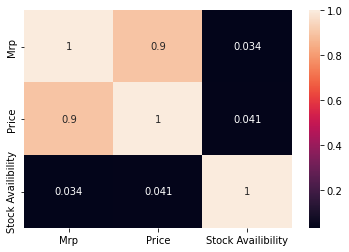

In [36]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)

<Figure size 720x576 with 0 Axes>

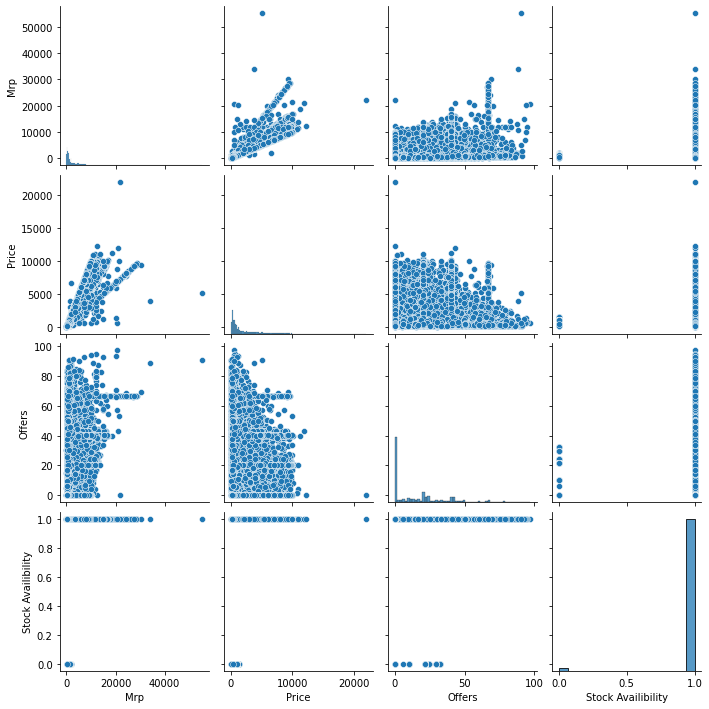

In [37]:
plt.figure(figsize=(10,8))
sns.pairplot(amzn)

In [38]:
#sns.relplot(x='Category', y=amzn['Brand'].value_counts(),data = amzn)

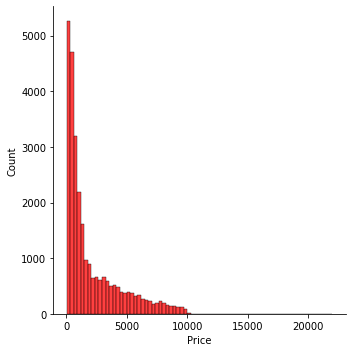

In [39]:
sns.displot(amzn['Price'], color="r", bins=75)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



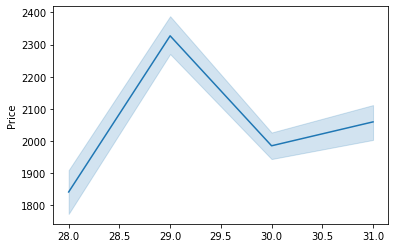

In [40]:
months = [amzn['Crawl Timestamp'][i].day for i in l]
sns.lineplot(months,amzn['Price'])

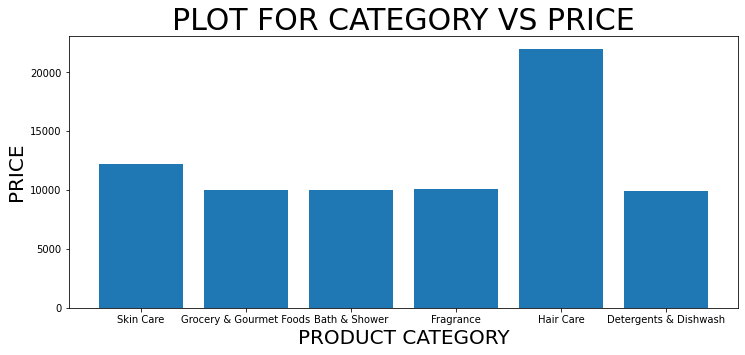

In [41]:
plt.figure(figsize = (12,5))
plt.title('PLOT FOR CATEGORY VS PRICE',fontsize=30)
plt.bar(amzn['Category'].tolist(),amzn['Price'].tolist())
plt.xlabel("PRODUCT CATEGORY",fontsize=20)
plt.ylabel("PRICE",fontsize=20)
plt.show()

In [42]:
fig = px.histogram(amzn, x="Category",title='Number of products sold in each category',labels={'Category':'Product Category'}, color_discrete_sequence=['green'] )
fig.show()
print("Skin Care products are the higest selling products in the month")

Skin Care products are the higest selling products in the month


In [43]:
amzn['Brand'].value_counts()[0:15].tolist()
brands = amzn['Brand'].value_counts()

In [44]:
brands[0:15].index

Index(['CHOCOCRAFT', 'Generic', 'Chocholik', 'World Beauty', 'BOGATCHI',
       'Stockout', 'Parag fragrances', 'Homely', 'Royal Beauty', 'Unknown',
       'De'Arco Chocolatier', 'Ancient Flower', 'BeautyNeeds', 'SLB Works',
       'BuyChoice'],
      dtype='object')

#### No. of products sold by top brands

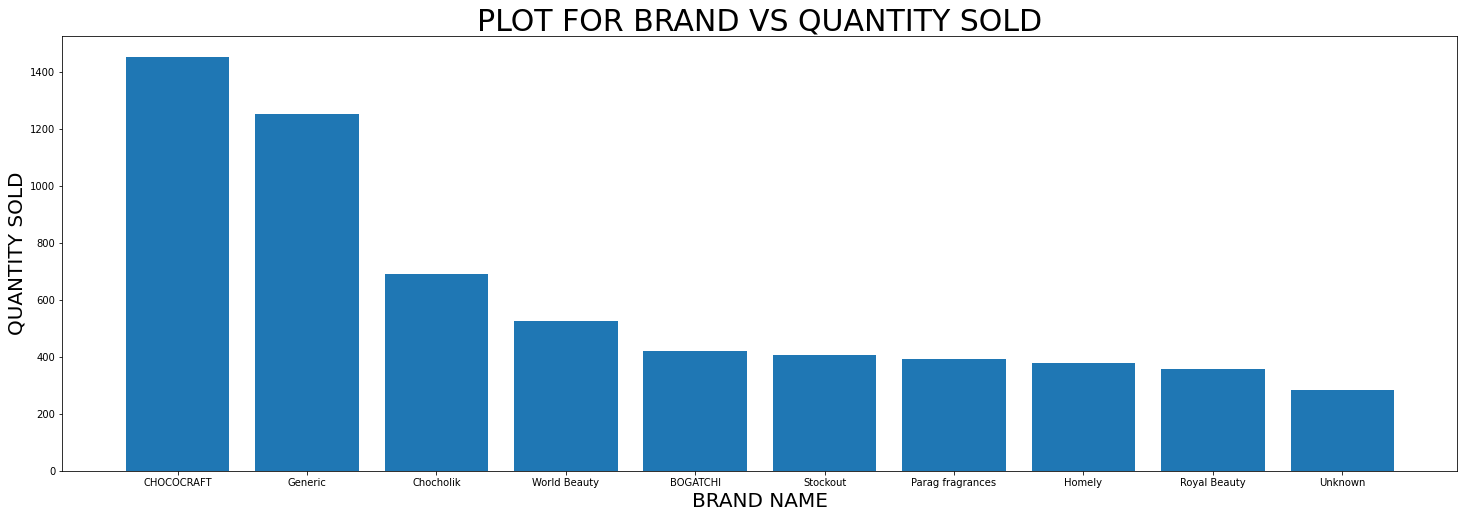

In [45]:
plt.figure(figsize = (25,8))
plt.title('PLOT FOR BRAND VS QUANTITY SOLD',fontsize=30)
plt.bar(list(brands[0:10].index),amzn['Brand'].value_counts()[0:10].tolist())
plt.xlabel("BRAND NAME",fontsize=20)
plt.ylabel("QUANTITY SOLD",fontsize=20)
plt.show()

**STOCK AVAILABILTY FOR DIFFERENT PRODUCTS**

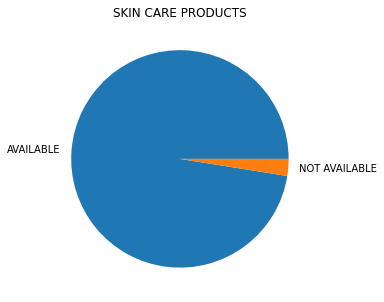

------------------------------------------------------------


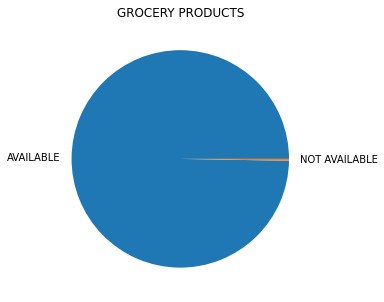

------------------------------------------------------------


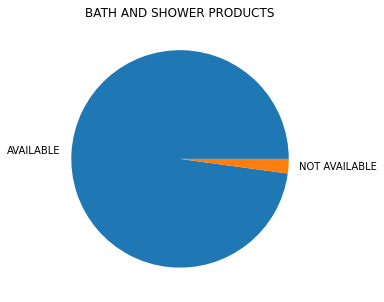

------------------------------------------------------------


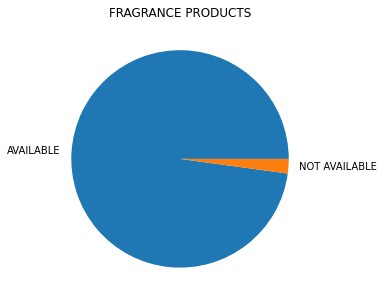

------------------------------------------------------------


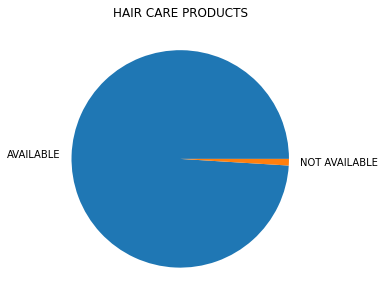

------------------------------------------------------------


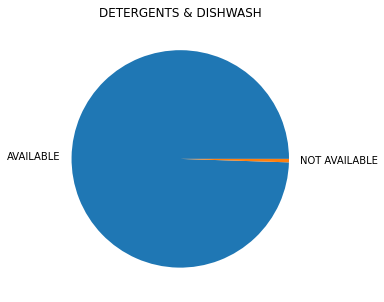

In [46]:
plt.figure(figsize = (12,5))
plt.title("SKIN CARE PRODUCTS")
plt.pie(skin_care['Stock Availibility'].value_counts().tolist(),labels=['AVAILABLE','NOT AVAILABLE'])
plt.show()
print("------------------------------------------------------------")
plt.figure(figsize = (12,5))
plt.title("GROCERY PRODUCTS")
plt.pie(grocery['Stock Availibility'].value_counts().tolist(),labels=['AVAILABLE','NOT AVAILABLE'])
plt.show()
print("------------------------------------------------------------")
plt.figure(figsize = (12,5))
plt.title("BATH AND SHOWER PRODUCTS")
plt.pie(bath['Stock Availibility'].value_counts().tolist(),labels=['AVAILABLE','NOT AVAILABLE'])
plt.show()
print("------------------------------------------------------------")
plt.figure(figsize = (12,5))
plt.title("FRAGRANCE PRODUCTS")
plt.pie(bath['Stock Availibility'].value_counts().tolist(),labels=['AVAILABLE','NOT AVAILABLE'])
plt.show()
print("------------------------------------------------------------")
plt.figure(figsize = (12,5))
plt.title("HAIR CARE PRODUCTS")
plt.pie(Hair['Stock Availibility'].value_counts().tolist(),labels=['AVAILABLE','NOT AVAILABLE'])
plt.show()
print("------------------------------------------------------------")
plt.figure(figsize = (12,5))
plt.title("DETERGENTS & DISHWASH")
plt.pie(Dish['Stock Availibility'].value_counts().tolist(),labels=['AVAILABLE','NOT AVAILABLE'])
plt.show()

In [47]:
# fig = px.histogram(amzn, x="Crawl Timestamp",title='Visualising the No. of products sold at a time interval',labels={'Crawl Timestamp':'Date and time of purchase'}, color_discrete_sequence=['green'] )
# fig.show()

In [48]:
import datetime
datetime.datetime.strptime('2019-10-30 11:38:11', "%Y-%m-%d %H:%M:%S")

datetime.datetime(2019, 10, 30, 11, 38, 11)

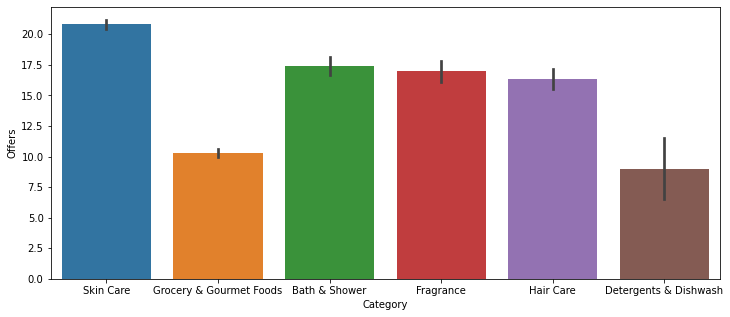

In [49]:
plt.figure(figsize = (12,5))
sns.barplot(x = amzn['Category'],y=amzn['Offers'])


[36, 32, 49, 66]


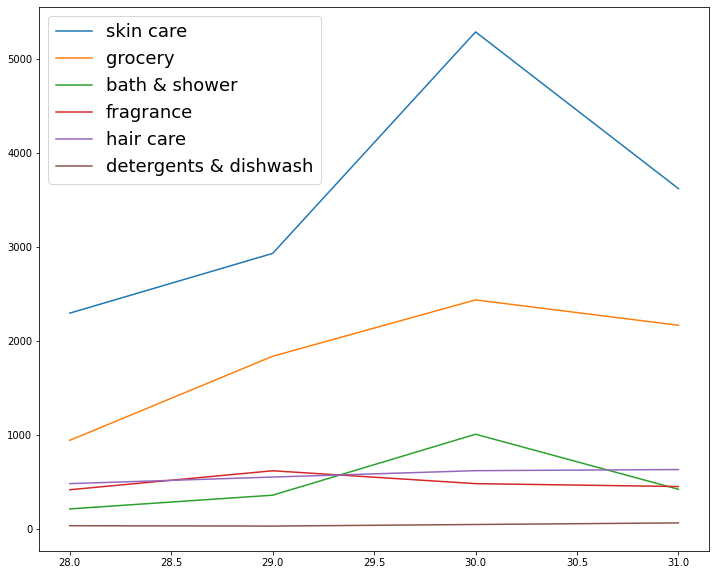

In [50]:
plt.figure(figsize = (12,10))

a = amzn[amzn['Category'] == 'Skin Care']
l = list(a.index)
months_skin_care = [a['Crawl Timestamp'][i].day for i in l]

days = list(set(months_skin_care))
product_sold_per_day_a =[months_skin_care.count(i) for i in days]



b = amzn[amzn['Category'] == 'Grocery & Gourmet Foods']
l = list(b.index)
months_grocery = [b['Crawl Timestamp'][i].day for i in l]

product_sold_per_day_b =[months_grocery.count(i) for i in days]



c = amzn[amzn['Category'] == 'Bath & Shower']
l = list(c.index)

months_grocery = [c['Crawl Timestamp'][i].day for i in l]

product_sold_per_day_c =[months_grocery.count(i) for i in days]


d = amzn[amzn['Category'] == 'Fragrance']
l = list(d.index)

months_grocery = [d['Crawl Timestamp'][i].day for i in l]

product_sold_per_day_d =[months_grocery.count(i) for i in days]


e = amzn[amzn['Category'] == 'Hair Care']
l = list(e.index)

months_grocery = [e['Crawl Timestamp'][i].day for i in l]

product_sold_per_day_e =[months_grocery.count(i) for i in days]



f = amzn[amzn['Category'] == 'Detergents & Dishwash']
l = list(f.index)
months_grocery = [f['Crawl Timestamp'][i].day for i in l]

product_sold_per_day_f =[months_grocery.count(i) for i in days]
print(product_sold_per_day_f)

plt.plot(days,product_sold_per_day_a,label="skin care")
plt.plot(days,product_sold_per_day_b,label="grocery")
plt.plot(days,product_sold_per_day_c,label="bath & shower")
plt.plot(days,product_sold_per_day_d,label ="fragrance")
plt.plot(days,product_sold_per_day_e,label ="hair care")
plt.plot(days,product_sold_per_day_f,label ="detergents & dishwash")
plt.legend(loc="upper left",fontsize=18)
plt.show()

Hence, from the above analysis we can conclude that skin care products are the highest grossing produts in the month with a large stock availibility and more offers.

In [51]:
print("THE MEAN OF THE PRICE COLUMN IS: ",np.mean(amzn['Price'].tolist()))
print("THE VARIANCE OF THE PRICE COLUMN IS: ",np.var(amzn['Price'].tolist()))
print("THE STANDARD DEVIATION OF THE PRICE COLUMN IS: ",(np.std(amzn['Price'].tolist())))

THE MEAN OF THE PRICE COLUMN IS:  2059.4591695822924
THE VARIANCE OF THE PRICE COLUMN IS:  5377099.856099646
THE STANDARD DEVIATION OF THE PRICE COLUMN IS:  2318.8574462652173


In [52]:
print("THE MEAN OF THE MRP COLUMN IS: ",np.mean(amzn['Mrp'].tolist()))
print("THE VARIANCE OF THE MRP COLUMN IS: ",np.var(amzn['Mrp'].tolist()))
print("THE STANDARD DEVIATION OF THE MRP COLUMN IS: ",np.sqrt(np.var(amzn['Mrp'].tolist())))

THE MEAN OF THE MRP COLUMN IS:  2557.4030896108534
THE VARIANCE OF THE MRP COLUMN IS:  9404690.239859972
THE STANDARD DEVIATION OF THE MRP COLUMN IS:  3066.706741744305


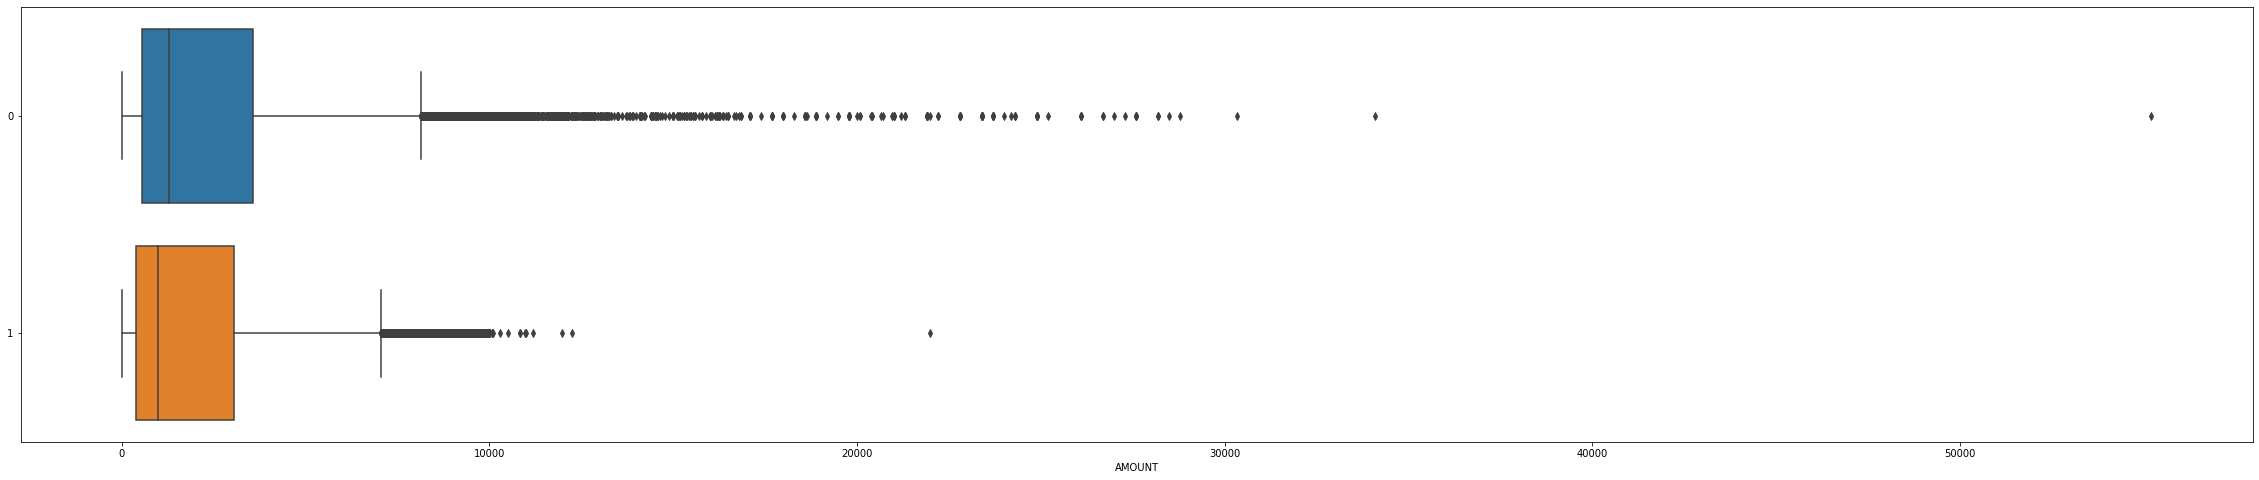

In [53]:
plt.figure(figsize = (40,8))
sns.boxplot(data = [amzn["Mrp"],amzn["Price"]],orient="h",)
plt.xlabel('AMOUNT')
plt.show()

### NORMALISATION

![image.png](https://miro.medium.com/max/1400/1*GwcC80mDUyscDAWtwZSBdA.png)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



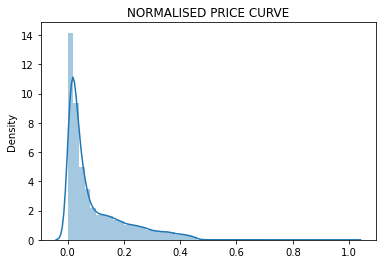

In [54]:
x_min = min(amzn['Price'].tolist())
x_max= max(amzn['Price'].tolist())
p_range = x_max - x_min
norm = [(amzn['Price'][i] - x_min)/p_range for i in range(len(amzn['Price']))]
sns.distplot(norm)
plt.title('NORMALISED PRICE CURVE')
plt.show()

#### STANDARDIZATION
Standardization transforms data to have a mean of zero and a standard deviation of 1. 



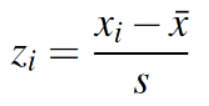

In [55]:
z_scores_price = []
mean_price = np.mean(amzn['Price'])
std_price = np.std(amzn['Price'])
for i in range(len(amzn['Uniq Id'])):
  z = (amzn['Price'][i] - mean_price)/std_price
  z_scores_price.append(z)

In [56]:
np.var(z_scores_price)

0.999999999999962

In [57]:
print(round(np.mean(z_scores_price),2))

-0.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'STANDARDISED PRICE CURVE')

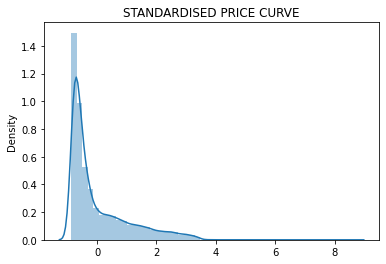

In [58]:
sns.distplot(z_scores_price,kde=True)
plt.title('STANDARDISED PRICE CURVE')

## MODEL DESIGN AND BUILDING

### Preprocessing

In [59]:
# converting to lower case
amzn['Product Description'] =  amzn['Product Description'].str.lower()

In [60]:
# removing punctuations and numnerical values
import re,string
amzn['Product Description'] = amzn['Product Description'].str.replace('[^\w\s]','')
amzn['Product Description'] = amzn['Product Description'].str.replace('\d+', '')

In [61]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [62]:
# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('english')

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
amzn['Product Description'] = amzn['Product Description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [63]:
 nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [64]:
#defining function for tokenization
from nltk.tokenize import sent_tokenize, word_tokenize
def tokenization(text):
    tokens = sent_tokenize(text)
    return tokens
#applying function to the column
amzn['Product Description']= amzn['Product Description'].apply(lambda x: tokenization(x))

In [65]:
amzn['Product Description']

0        [professional grade face peel peel stimulates ...
1        [item name mm titanium needles microneedles me...
2        [use eye item type cream net wt g gzzz ygzwbz ...
3        [prevent tongue dropping backward block airway...
4        [package quantity contains borage oil clinical...
                               ...                        
28005    [needful sky drop washing liquid laundry deter...
28006    [tides new ultra matic laundry detergent powde...
28007    [new ariel matic liquid detergent gives tough ...
28008    [needful cleans softens freshens protects fabr...
28009    [item package quantity zout triple enzyme form...
Name: Product Description, Length: 28010, dtype: object

In [66]:
#importing the Stemming function from nltk library
from nltk.stem.porter import PorterStemmer
#defining the object for stemming
porter_stemmer = PorterStemmer()

In [67]:
#defining a function for stemming
def stemming(text):
  stem_text = [porter_stemmer.stem(word) for word in text]
  return stem_text
amzn['Product Description']=amzn['Product Description'].apply(lambda x: stemming(x))

In [68]:
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

In [69]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [70]:
#defining the function for lemmatization
def lemmatizer(text):
  lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
  return lemm_text
amzn['Product Description']=amzn['Product Description'].apply(lambda x:lemmatizer(x))

In [71]:
# Need to convert to vector form using tfidf, bag of words or count vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
amzn['test_text'] = amzn['Product Description'].apply(lambda x: ' '.join(x))

In [72]:
vectorizer = TfidfVectorizer(ngram_range=(1,2))
X = vectorizer.fit_transform(amzn['test_text'])

In [73]:
X.shape

(28010, 438852)

### MODEL TESTING

### Support Vector Classifier Model

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [75]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,r2_score,f1_score
from math import sqrt

#### Cross validation

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, amzn['Category'], test_size=0.30, random_state = 50)    
clf = SVC(kernel='linear').fit(X_train, y_train)

#### Model score

In [77]:
predictions = clf.predict(X_test)
from sklearn.metrics import classification_report
print (classification_report(y_test, predictions))

                         precision    recall  f1-score   support

          Bath & Shower       0.70      0.28      0.40       647
  Detergents & Dishwash       0.96      0.51      0.67        53
              Fragrance       0.85      0.81      0.83       582
Grocery & Gourmet Foods       0.98      0.97      0.98      2195
              Hair Care       0.91      0.79      0.85       692
              Skin Care       0.85      0.96      0.90      4234

               accuracy                           0.88      8403
              macro avg       0.87      0.72      0.77      8403
           weighted avg       0.88      0.88      0.87      8403



In [78]:
print("accuracy on test:",accuracy_score(y_test,predictions))
svc_score = accuracy_score(y_test,predictions)

accuracy on test: 0.88230393906938


### Multinomial Naive bayes model

In [79]:
from sklearn.naive_bayes import MultinomialNB
mNb = MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [80]:
mNb.fit(X_train,y_train)

MultinomialNB(alpha=0.1)

In [81]:
predictions_mNb = mNb.predict(X_test)
print (classification_report(y_test, predictions_mNb,labels=np.unique(predictions_mNb)))

                         precision    recall  f1-score   support

          Bath & Shower       0.59      0.32      0.42       647
  Detergents & Dishwash       1.00      0.25      0.39        53
              Fragrance       0.84      0.85      0.85       582
Grocery & Gourmet Foods       0.98      0.98      0.98      2195
              Hair Care       0.91      0.77      0.83       692
              Skin Care       0.86      0.94      0.90      4234

               accuracy                           0.88      8403
              macro avg       0.86      0.68      0.73      8403
           weighted avg       0.87      0.88      0.87      8403



In [82]:
print("accuracy:",accuracy_score(y_test,predictions_mNb))
mnb_score = accuracy_score(y_test,predictions_mNb)

accuracy: 0.8790908009044389


### RANDOM FOREST


In [83]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200,max_depth=8, random_state=0,criterion="entropy")
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=200,
                       random_state=0)

In [84]:
predictions_rfc = rfc.predict(X_test)
print (classification_report(y_test, predictions_rfc,labels=np.unique(predictions_rfc)))

                         precision    recall  f1-score   support

              Fragrance       1.00      0.10      0.19       582
Grocery & Gourmet Foods       1.00      0.31      0.47      2195
              Skin Care       0.55      1.00      0.71      4234

              micro avg       0.59      0.71      0.64      7011
              macro avg       0.85      0.47      0.46      7011
           weighted avg       0.73      0.71      0.59      7011



In [85]:
print("accuracy:",accuracy_score(y_test,predictions_rfc))
rfc_score = accuracy_score(y_test,predictions_rfc)

accuracy: 0.5915744377008212


###GRADIENT BOOSTING


In [86]:
from xgboost import XGBClassifier

In [87]:

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [88]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred,labels=np.unique(y_pred)))
# evaluate predictions
xgb_score = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (xgb_score * 100.0))

                         precision    recall  f1-score   support

          Bath & Shower       0.63      0.32      0.42       647
  Detergents & Dishwash       1.00      0.47      0.64        53
              Fragrance       0.83      0.77      0.80       582
Grocery & Gourmet Foods       0.97      0.82      0.89      2195
              Hair Care       0.87      0.79      0.83       692
              Skin Care       0.79      0.94      0.86      4234

               accuracy                           0.83      8403
              macro avg       0.85      0.68      0.74      8403
           weighted avg       0.84      0.83      0.82      8403

Accuracy: 83.30%


### PERCEPTRON MODEL

In [89]:
from sklearn.linear_model import Perceptron
perc = Perceptron(penalty=None, alpha=0.5, fit_intercept=True, shuffle=False, verbose=0, eta0=1.0, n_jobs=1, random_state=0, class_weight=None, warm_start=False)
perc.fit(X_train,y_train)

Perceptron(alpha=0.5, n_jobs=1, shuffle=False)

In [90]:
predictions_perc = perc.predict(X_test)
print (classification_report(y_test, predictions_perc,labels=np.unique(predictions_perc)))

                         precision    recall  f1-score   support

          Bath & Shower       0.54      0.43      0.48       647
  Detergents & Dishwash       0.59      0.89      0.71        53
              Fragrance       0.81      0.89      0.85       582
Grocery & Gourmet Foods       0.95      0.98      0.96      2195
              Hair Care       0.82      0.87      0.84       692
              Skin Care       0.90      0.89      0.90      4234

               accuracy                           0.88      8403
              macro avg       0.77      0.82      0.79      8403
           weighted avg       0.87      0.88      0.87      8403



In [91]:
print("accuracy:",accuracy_score(y_test,predictions_perc))
percp_score = accuracy_score(y_test,predictions_perc)

accuracy: 0.876710698560038


### CONCLUSION AND BEST MODEL

In [92]:
models_score = {'SVC':svc_score , 'Multinomial Naive bayes':mnb_score,'RFC':rfc_score,'XGboost':xgb_score,'perceptron':percp_score}
columns = list(models_score.keys())
values = list(models_score.values())

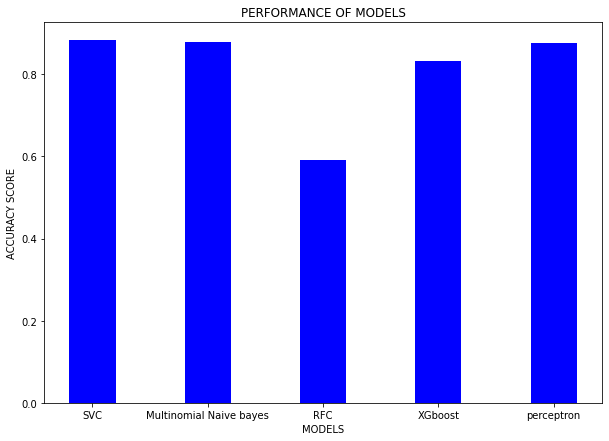

In [93]:
# creating the plot for r-trees
plt.figure(figsize=(10,7))
plt.bar(columns, values, color ='blue',
        width = 0.4)
plt.xlabel('MODELS')
plt.ylabel('ACCURACY SCORE')
plt.title('PERFORMANCE OF MODELS')
plt.show()

#### Time taken for training models
This is just to get a rough idea of how much time each model takes to fit.

In [94]:
# cell execution time taken into account
time_taken = {'SVC':120 , 'Multinomial Naive bayes':30,'RFC':62,'XGboost':600,'perceptron':26}
columns = list(time_taken.keys())
values = list(time_taken.values())

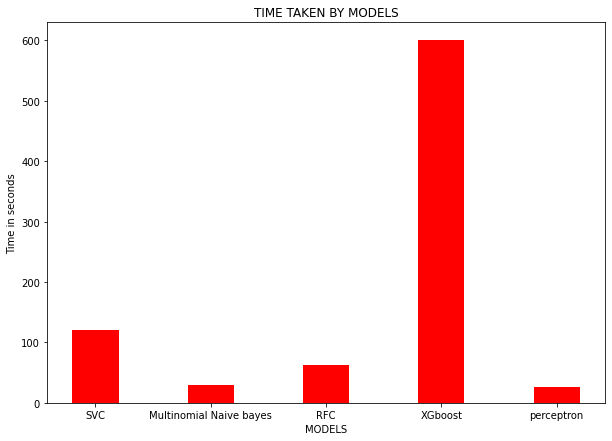

In [95]:
# creating the plot for r-trees
plt.figure(figsize=(10,7))
plt.bar(columns, values, color ='red',
        width = 0.4)
plt.xlabel('MODELS')
plt.ylabel('Time in seconds')
plt.title('TIME TAKEN BY MODELS')
plt.show()

#### Dumping the models
Dumping the models in pickle file which can be re-used again.

In [96]:
import joblib
joblib.dump(clf,'svc.pkl')

['svc.pkl']

In [97]:
joblib.dump(mNb,'mnb.pkl')
joblib.dump(rfc,'rfc.pkl')
joblib.dump(model,'xgb.pkl')
joblib.dump(perc,'percp.pkl')

['percp.pkl']

### Conclusion
The current model is designed for classifying household and personal care products which is not the case in general. The data which gets streamed from e-commerce websites is enormous, so our model should be designed in such a way that it is ready for online/incremental learning. In future we would like to work and improve our model to make it more suitable for online/incremental learning.